In [4]:
#Importações para Manipulação e Análise de Dados
import pandas as pd
import numpy as np

#Importações para Visualização de Dados 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Importações para Machine Learning e Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb

#Importação para Salvar o Modelo
import joblib

#Estilo estético para os gráficos do seaborn
sns.set_style('whitegrid')
#Tamanho padrão para as figuras do matplotlib
plt.rcParams['figure.figsize'] = (12, 6)

In [5]:
# Carrega o conjunto de dados a partir do arquivo CSV
df = pd.read_csv('data\desafio_indicium_imdb.csv', index_col=0)

# Exibe as primeiras 5 linhas para uma inspeção inicial
print("Amostra dos dados:")
display(df.head())

Amostra dos dados:


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\2430687922.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('data\desafio_indicium_imdb.csv', index_col=0)


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [6]:
# Exibe informações sobre o DataFrame, incluindo tipos de dados e valores não nulos
print("\nInformações do DataFrame:")
df.info()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


In [7]:
# Calcula e exibe a contagem de valores ausentes para cada coluna
valores_ausentes = df.isnull().sum()
print(valores_ausentes)

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


É notavel que exitem colunas importantes com valores ausentes,agora é preciso tratar cada uma de forma especifica para não generalizar. 

In [8]:
# Remove as vírgulas e converte para o tipo numérico (float)
# Erros de conversão também se tornarão NaN
df['Gross'] = df['Gross'].str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

In [9]:
# Calcula a mediana do faturamento para cada gênero e usa isso para preencher os valores ausentes
df['Gross'] = df.groupby('Genre')['Gross'].transform(lambda x: x.fillna(x.median()))

# Pode haver gêneros raros que não têm outros filmes para calcular a mediana.
# Nesses casos, preenchemos os restantes com a mediana geral como um fallback.
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeW

In [10]:
#Remoção da strig 'min' na coluna Runtime
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

Para os valores ausentes da coluna certificate, foi criada uma nova categoria "Not Rated", apenas inferir novos valores poderia ser equivocado. 

In [11]:
#Atribuir nova catergoria para os valores ausentes de certificate 
df['Certificate'] = df['Certificate'].fillna('Not Rated')

Para a coluna de meta_score foi imputado valores com base na mediana dos filmes de mesmo genero

In [12]:
# 1. Tenta preencher cada Meta_score ausente com a mediana do seu grupo de Gênero.
df['Meta_score'] = df.groupby('Genre')['Meta_score'].transform(lambda x: x.fillna(x.median()))

# 2. Fallback: Se algum gênero não tinha nenhum Meta_score válido para calcular a mediana 
# Então, preenchemos os poucos que sobraram com a mediana GERAL.
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())

c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeW

In [13]:
valores_ausentes = df.isnull().sum()
print(valores_ausentes)

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [14]:
#Converter a coluna 'Released_Year' para um tipo numérico.
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

In [15]:
valores_ausentes = df.isnull().sum()
print(valores_ausentes)

Series_Title     0
Released_Year    1
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [16]:
#verificando qual linha está com o valor de ano nulo 
df[df['Released_Year'].isnull()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,NaN,U,140,"Adventure, Drama, History",7.60,NASA must devise a strategy to return Apollo 1...,77.00,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933.00"


In [17]:
#Agora verificando a linha 966 no df original para analisar o que constava na mesma antes da conversão
df_original = pd.read_csv('data\desafio_indicium_imdb.csv', index_col=0)

df_original.loc[966]

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\4145612741.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_original = pd.read_csv('data\desafio_indicium_imdb.csv', index_col=0)


Series_Title                                             Apollo 13
Released_Year                                                   PG
Certificate                                                      U
Runtime                                                    140 min
Genre                                    Adventure, Drama, History
IMDB_Rating                                                   7.60
Overview         NASA must devise a strategy to return Apollo 1...
Meta_score                                                   77.00
Director                                                Ron Howard
Star1                                                    Tom Hanks
Star2                                                  Bill Paxton
Star3                                                  Kevin Bacon
Star4                                                  Gary Sinise
No_of_Votes                                                 269197
Gross                                                  173,837

Podemos notar que no lugar de ano temos PG o que está incorreto, como esse erro foi pontual, fazendo uma busca na internet descobri que o ano de lançamento é 1995 e o certificado é PG. Agora podemos realizar a alteração diretamente no dataset.


In [18]:
# Corrigindo o ano e o certificado para o filme Apollo 13 usando o índice 966
df.loc[966, 'Released_Year'] = float(1995)
df.loc[966, 'Certificate'] = 'PG'

In [19]:
df.loc[966]

Series_Title                                             Apollo 13
Released_Year                                             1,995.00
Certificate                                                     PG
Runtime                                                        140
Genre                                    Adventure, Drama, History
IMDB_Rating                                                   7.60
Overview         NASA must devise a strategy to return Apollo 1...
Meta_score                                                   77.00
Director                                                Ron Howard
Star1                                                    Tom Hanks
Star2                                                  Bill Paxton
Star3                                                  Kevin Bacon
Star4                                                  Gary Sinise
No_of_Votes                                                 269197
Gross                                               173,837,93

In [20]:
#Conversão do coluna de ano para int 
df['Released_Year'] = df['Released_Year'].astype(int)

In [21]:
# Verificar se existem linhas duplicadas
num_duplicatas = df.duplicated().sum()
print(f"Número de linhas duplicadas no dataset: {num_duplicatas}")

Número de linhas duplicadas no dataset: 0


Aqui é realizado a inserção de novos dados para atualizar o valor de Gross, será criada uma nova coluna com os valores corrigidos de acordo com a inflação. Sera usado a tabela com o Índice de Preços ao Consumidor (CPI - Consumer Price Index) dos EUA para cada ano. Retidada de: https://fred.stlouisfed.org/series/CPIAUCNS

In [22]:
# Carrega o arquivo CPIAUCNS.csv
df_cpi_raw = pd.read_csv('data/CPIAUCNS.csv')

In [23]:
print(df_cpi_raw.columns)

Index(['observation_date', 'CPIAUCNS'], dtype='object')


In [24]:
#Converte a coluna de data para o formato de data
df_cpi_raw['observation_date'] = pd.to_datetime(df_cpi_raw['observation_date'])

In [25]:
#Extrair o ano da coluna 'observation_date'
df_cpi_raw['Year'] = df_cpi_raw['observation_date'].dt.year

In [26]:
#Agrupar por ano e calcular a média do CPI
df_cpi_anual = df_cpi_raw.groupby('Year')['CPIAUCNS'].mean().reset_index()
df_cpi_anual.rename(columns={'CPIAUCNS': 'CPI'}, inplace=True)
print(df_cpi_anual.tail())

     Year    CPI
108  2021 270.97
109  2022 292.65
110  2023 304.70
111  2024 313.69
112  2025 320.63


In [27]:
df_filmes= df

In [28]:
#Combinar os datasets 
df_combinado = pd.merge(df_filmes, df_cpi_anual, left_on='Released_Year', right_on='Year', how='left')


In [29]:
#Calcular a Coluna 'Gross_Adjusted' 

# Pega o CPI mais recente como base
cpi_base = df_cpi_anual.loc[df_cpi_anual['Year'] == 2020, 'CPI'].iloc[0]

# Calcula o faturamento ajustado
df_combinado['Gross_Adjusted'] = df_combinado['Gross'] * (cpi_base / df_combinado['CPI'])

print("Amostra dos dados finais:")
# Mostra as colunas mais importantes para verificação
display(df_combinado[['Series_Title', 'Released_Year', 'Gross', 'CPI', 'Gross_Adjusted']].head())

Amostra dos dados finais:


,Series_Title,Released_Year,Gross,CPI,Gross_Adjusted
0,The Godfather,1972,"134,966,411.00",41.82,"835,332,346.55"
1,The Dark Knight,2008,"534,858,444.00",215.30,"642,943,476.70"
2,The Godfather: Part II,1974,"57,300,000.00",49.31,"300,758,083.83"
3,12 Angry Men,1957,"4,360,000.00",28.09,"40,169,090.00"
4,The Lord of the Rings: The Return of the King,2003,"377,845,905.00",183.96,"531,591,788.86"


In [30]:
#Análise Univariada de Variáveis Numéricas
numeric_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime', 'Gross']
df[numeric_cols].describe()

,IMDB_Rating,Meta_score,No_of_Votes,Runtime,Gross
count,999.00,999.00,999.00,999.00,999.00
mean,7.95,77.84,"271,621.42",122.87,"62,415,035.69"
std,0.27,11.80,"320,912.62",28.10,"103,048,662.21"
min,7.60,28.00,"25,088.00",45.00,"1,305.00"
25%,7.70,71.00,"55,471.50",103.00,"4,360,000.00"
50%,7.90,79.00,"138,356.00",119.00,"22,276,975.00"
75%,8.10,86.00,"373,167.50",137.00,"70,753,486.50"
max,9.20,100.00,"2,303,232.00",321.00,"936,662,225.00"


Distribuição das Variáveis Numéricas do DataFrame Combinado:


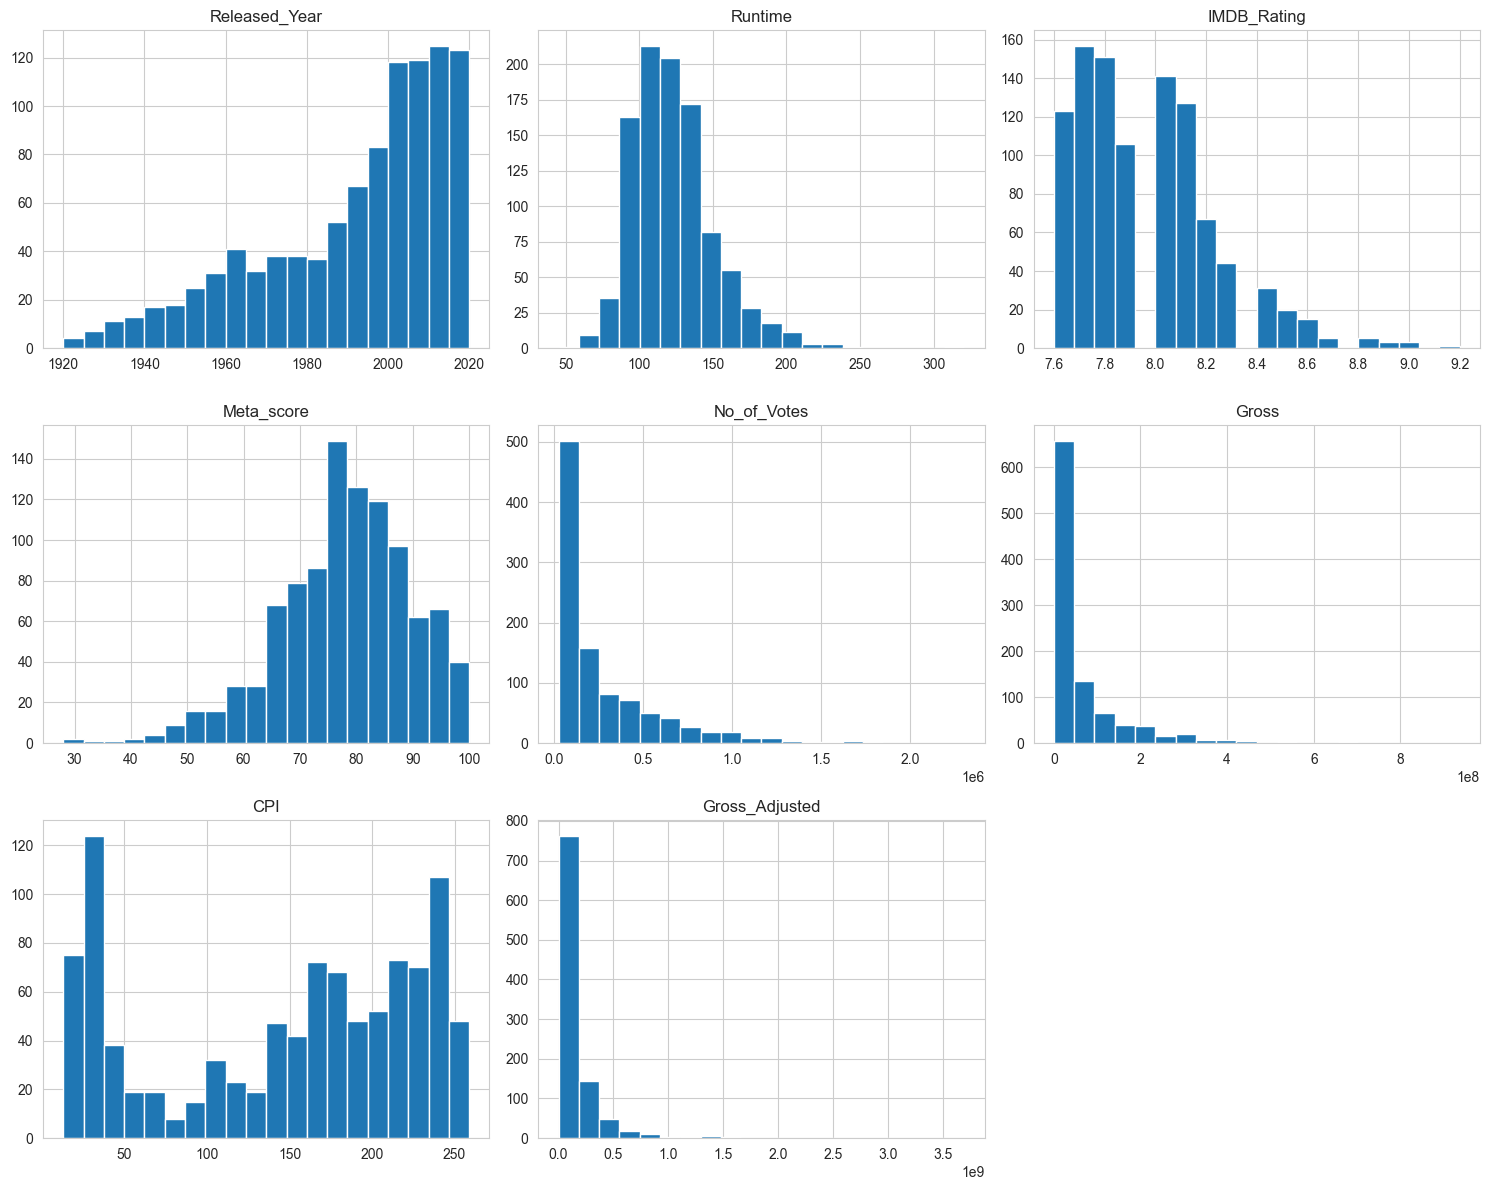

In [31]:
#Histogramas para visualizar a distribuição de cada variável numérica

# Define a lista de colunas numéricas do seu novo DataFrame

numeric_cols_combinado = [
    'Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 
    'No_of_Votes', 'Gross', 'CPI', 'Gross_Adjusted']

# Gera os histogramas
print("Distribuição das Variáveis Numéricas do DataFrame Combinado:")
df_combinado[numeric_cols_combinado].hist(bins=20, figsize=(15, 12))
plt.tight_layout()

NameError: name 'FuncFormatter' is not defined

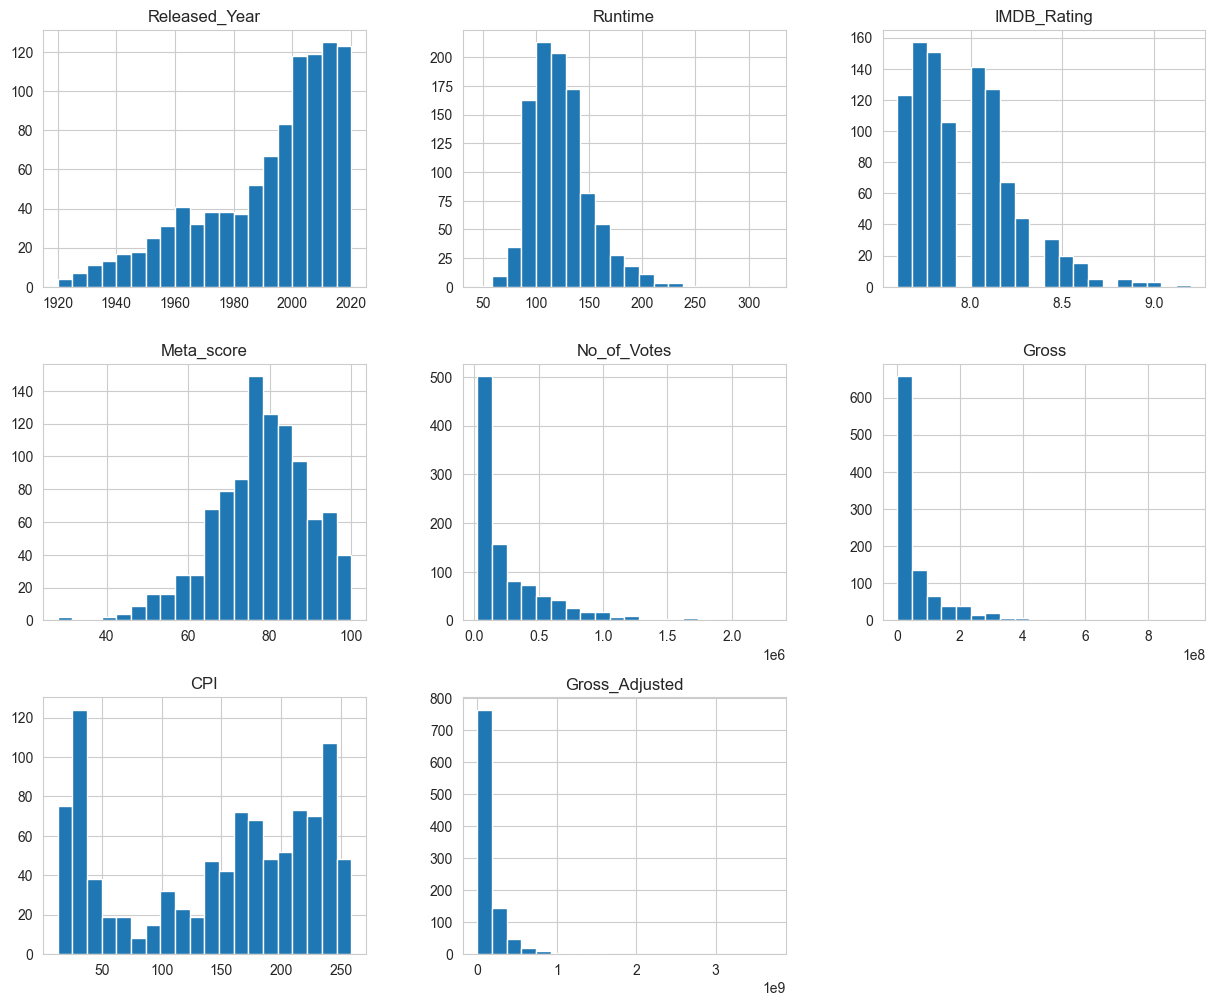

In [32]:
# 1. Defina a função de formatação
def format_axis(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.0f}M' # Formato para Milhões
    if x >= 1e3:
        return f'{x/1e3:.0f}k' # Formato para Milhares
    return x

# 2. Defina as colunas que você quer plotar
numeric_cols_combinado = [
    'Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 
    'No_of_Votes', 'Gross', 'CPI', 'Gross_Adjusted'
]

# 3. Crie os histogramas. A função .hist() retorna um array de eixos (axes).
axes = df_combinado[numeric_cols_combinado].hist(bins=20, figsize=(15, 12))

# 4. Itere sobre os eixos e aplique a formatação onde for necessário
# O método .flatten() transforma a matriz de eixos em uma lista única para facilitar o loop
for ax in axes.flatten():
    # Verificamos o título do eixo Y para saber qual coluna ele representa
    col_name = ax.get_title()
    if col_name in ['Gross', 'Gross_Adjusted', 'No_of_Votes']:
        ax.xaxis.set_major_formatter(FuncFormatter(format_axis))

plt.tight_layout()
plt.show()

In [34]:
# Supondo que 'df_combinado' já existe e está pronto.

# Configura o formato de exibição para facilitar a leitura
pd.options.display.float_format = '{:,.2f}'.format

# Ordena o DataFrame pela coluna 'Gross_Adjusted' em ordem decrescente e pega os 10 primeiros
top_10_faturamento = df_combinado.sort_values(by='Gross_Adjusted', ascending=False).head(20)

print("Top 10 Filmes por Faturamento Ajustado pela Inflação:")
display(top_10_faturamento[['Series_Title', 'Released_Year', 'Gross', 'Gross_Adjusted']])

Top 10 Filmes por Faturamento Ajustado pela Inflação:


,Series_Title,Released_Year,Gross,Gross_Adjusted
313,Gone with the Wind,1939,"198,676,459.00","3,697,041,544.13"
708,Red River,1948,"185,671,660.50","1,998,775,697.92"
712,Stagecoach,1939,"94,611,424.00","1,760,562,710.04"
875,The Invisible Man,1933,"78,900,000.00","1,578,881,524.48"
995,Giant,1956,"162,805,434.00","1,550,062,451.74"
176,Sholay,1975,"315,058,289.00","1,515,155,218.53"
874,Fantasia,1940,"76,408,097.00","1,411,678,909.75"
294,The Man Who Shot Liberty Valance,1962,"162,805,434.00","1,392,921,134.32"
28,Star Wars,1977,"322,740,140.00","1,378,172,729.22"
418,The Exorcist,1973,"232,906,145.00","1,357,628,628.63"


In [ ]:
# --- Análise Univariada de Gêneros ---
# Como um filme pode ter múltiplos gêneros, separamos e contamos cada um
genre_counts = df['Genre'].str.split(', ').explode().value_counts()

Agora temos todos valores ausentes tratados e podemos partir para as visualizaçõe